In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import norm
import math
import pickle
import glob

In [3]:
def create_acc_mtrx(file):
    acc_list = []
    with open(file) as f:
        content = f.readlines()
        target_line = [l for l in content if l.startswith('Test set:')]
        acc_list = [float(l.split('(')[-1].split('%')[0]) for l in target_line]
        
    return np.asarray(acc_list)

In [4]:
# imp_node_result = create_acc_mtrx(file = '/Users/mac/Desktop/DropConnect_DPP/mnist_dpp/importance_node_MNIST_0.0_batch1000_output_round1.txt')
# imp_edge_result = create_acc_mtrx(file = '/Users/mac/Desktop/DropConnect_DPP/mnist_dpp/importance_edge_MNIST_0.0_batch1000_output_round1.txt')

# print(imp_node_result.shape)

In [5]:
dpp_node_result = np.loadtxt('./MNIST_DPP_node_0.0_batch1000_results.csv', delimiter=',')
print(dpp_node_result.shape)

dpp_node_mean = np.mean(dpp_node_result, axis = 1)
dpp_node_std = np.std(dpp_node_result, axis = 1)

print(dpp_node_mean.shape, dpp_node_std.shape)

(9, 10)
(9,) (9,)


In [7]:
dpp_edge_result = np.loadtxt('./MNIST_DPP_edge_0.0_batch1000_results.csv', delimiter=',')
print(dpp_edge_result.shape)

dpp_edge_mean = np.mean(dpp_edge_result, axis = 1)
dpp_edge_std = np.std(dpp_edge_result, axis = 1)
print(dpp_edge_mean.shape, dpp_edge_std.shape)

(9, 10)
(9,) (9,)


In [8]:
rand_edge_result = np.loadtxt('./MNIST_rand_edge_0.0_batch1000_results.csv', delimiter=',')
print(rand_edge_result.shape)

rand_edge_mean = np.mean(rand_edge_result, axis = 1)
rand_edge_std = np.std(rand_edge_result, axis = 1)
print(rand_edge_mean, rand_edge_std)

(9, 10)
[31.713 42.258 59.073 78.693 89.137 93.115 94.796 95.623 96.064] [1.78613017 1.4243581  2.44682263 2.31599244 1.51100662 0.40662636
 0.16971741 0.10668177 0.04841487]


Text(0.5, 1.0, 'MNIST Test Accuracy')

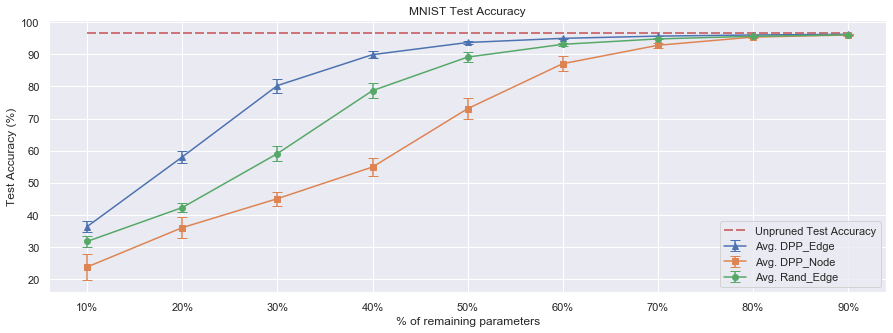

In [9]:
fig, axs = plt.subplots(1, 1, sharey = True, tight_layout = False, figsize=(15,5))

x = [str(i * 10) + '%' for i in range(1, 10)]
axs.errorbar(x, dpp_edge_mean, yerr = dpp_edge_std, marker = '^', capsize=5, label = 'Avg. DPP_Edge')
axs.errorbar(x, dpp_node_mean, yerr = dpp_node_std, marker = 's', capsize=5, label = 'Avg. DPP_Node')
axs.errorbar(x, rand_edge_mean, yerr = rand_edge_std, marker = 'o', capsize=5, label = 'Avg. Rand_Edge')

# axs.plot(x, imp_node_result, marker = 'x', label = 'Importance Node')
# axs.plot(x, imp_edge_result, marker = '+', label = 'Importance Edge')

axs.plot(x, [96.7 for i in x], dashes=[6, 2], label="Unpruned Test Accuracy")

axs.set_xlabel('% of remaining parameters')
axs.set_ylabel('Test Accuracy (%)')
axs.legend(loc = 'best')

title = 'MNIST Test Accuracy'
axs.set_title(title)

In [12]:
node_rwt_files = glob.glob('/Users/mac/Desktop/DropConnect_DPP/mnist_dpp/dpp_node_rwt_MNIST_results/*.txt')
node_rwt_acc = []
for f in node_rwt_files:
    acc_arr = create_acc_mtrx(f)
    node_rwt_acc.append(acc_arr)
node_rwt_results = np.stack(node_rwt_acc) # (10, 9)
print(node_rwt_results.shape)

node_rwt_mean = np.mean(node_rwt_results, axis = 0)
node_rwt_std = np.std(node_rwt_results, axis = 0)

print(node_rwt_mean.shape, node_rwt_std.shape)

(10, 9)
(9,) (9,)


Text(0.5, 1.0, 'MNIST Test Accuracy')

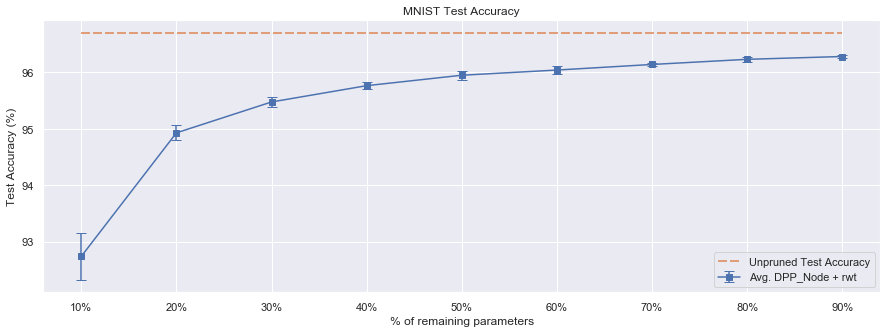

In [13]:
fig, axs = plt.subplots(1, 1, sharey = True, tight_layout = False, figsize=(15,5))

x = [str(i * 10) + '%' for i in range(1, 10)]
# axs.errorbar(x, dpp_edge_mean, yerr = dpp_edge_std, marker = '^', capsize=5, label = 'Avg. DPP_Edge + rwt')
axs.errorbar(x, node_rwt_mean, yerr = node_rwt_std, marker = 's', capsize=5, label = 'Avg. DPP_Node + rwt')
# axs.errorbar(x, rand_edge_mean, yerr = rand_edge_std, marker = 'o', capsize=5, label = 'Avg. Rand_Edge')

# axs.plot(x, imp_node_result, marker = 'x', label = 'Importance Node')
# axs.plot(x, imp_edge_result, marker = '+', label = 'Importance Edge')

axs.plot(x, [96.7 for i in x], dashes=[6, 2], label="Unpruned Test Accuracy")

axs.set_xlabel('% of remaining parameters')
axs.set_ylabel('Test Accuracy (%)')
axs.legend(loc = 'best')

title = 'MNIST Test Accuracy'
axs.set_title(title)